**A**: "Com base no último filme que a pessoa asssitiu e gostou, quais filmes ela gostaria de asssitir também?"

**G**: Obter os dados

In [ ]:
import pandas as pd

df = pd.read_csv('/content/TMDB_movie_dataset_v11.csv')

df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


**E**: Explorar os dados

In [ ]:
df.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,236641
revenue,0
runtime,0
adult,0
backdrop_path,925934


In [ ]:
print(df.dtypes)

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
backdrop_path            object
budget                    int64
homepage                 object
imdb_id                  object
original_language        object
original_title           object
overview                 object
popularity              float64
poster_path              object
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object


In [ ]:
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns

choosed_columns = ['vote_average', 'vote_count', 'revenue', 'runtime', 'popularity']
# Selecionar apenas colunas numéricas (int64 e float64)
numeric_cols = df[choosed_columns]

# Aplicar o teste de normalidade
print("Teste de normalidade (D'Agostino e Pearson):\n")
for col in numeric_cols.columns:
    data = numeric_cols[col].dropna()

    if len(data) < 8:
        print(f"- {col}: Dados insuficientes (menos de 8 valores)")
        continue

    stat, p = normaltest(data)
    if p > 0.05:
        result = "provavelmente NORMAL"
    else:
        result = "NÃO normal"

    print(f"- {col}: p = {p:.5f} => {result}")



Teste de normalidade (D'Agostino e Pearson):

- vote_average: p = 0.00000 => NÃO normal
- vote_count: p = 0.00000 => NÃO normal
- revenue: p = 0.00000 => NÃO normal
- runtime: p = 0.00000 => NÃO normal
- popularity: p = 0.00000 => NÃO normal


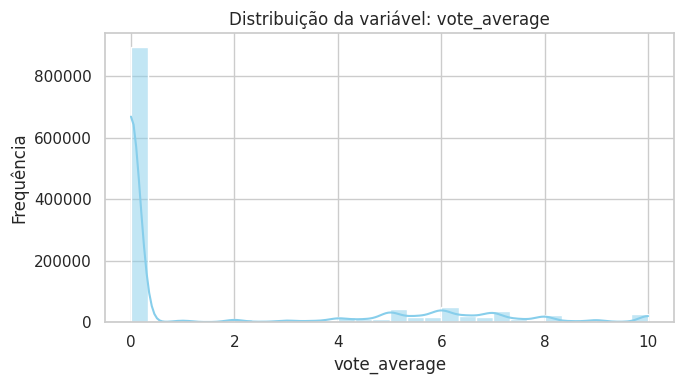

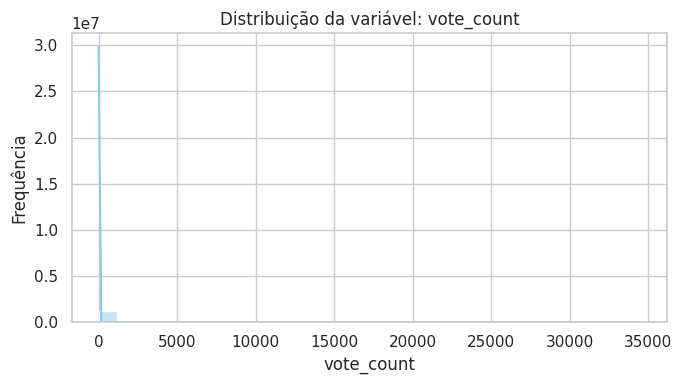

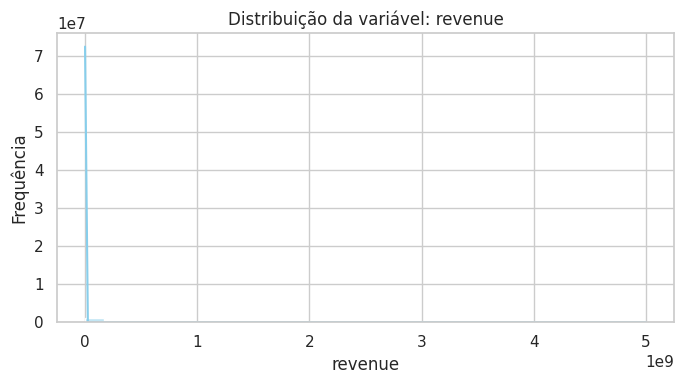

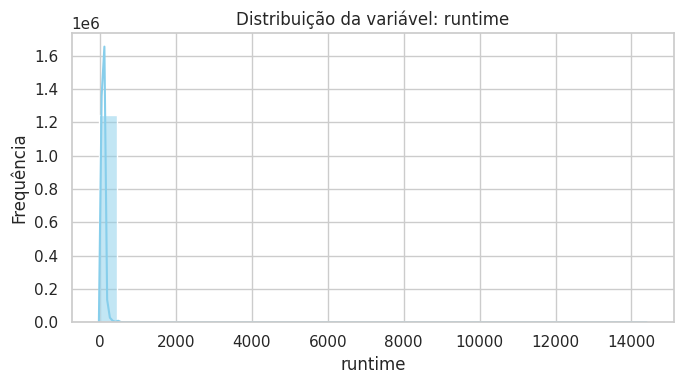

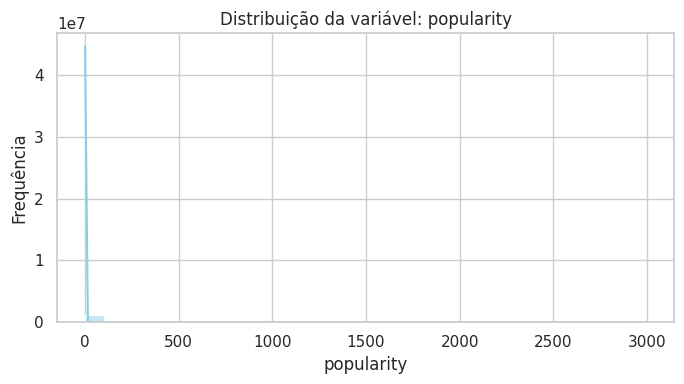

In [ ]:
sns.set(style="whitegrid")

# Criar um gráfico para cada coluna numérica
for col in numeric_cols.columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição da variável: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.tight_layout()
    plt.show()

In [ ]:
columns_to_drop = ['backdrop_path', 'homepage', 'imdb_id', 'poster_path']

df_processed = df.drop(columns=columns_to_drop)

df_processed.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
from scipy.stats import spearmanr

# Remover nulos para evitar erros
df_corr = df[['revenue', 'budget']].dropna()

# Calcular correlação de Spearman
corr, p = spearmanr(df_corr['revenue'], df_corr['budget'])

print(f"Correlação de Spearman entre revenue e budget:")
print(f"Coeficiente de correlação: {corr:.4f}")
print(f"Valor-p: {p:.5f}")

# Interpretação básica
if p < 0.05:
    print("=> Existe uma correlação estatisticamente significativa.")
else:
    print("=> Não há correlação estatisticamente significativa.")


Correlação de Spearman entre revenue e budget:
Coeficiente de correlação: 0.3899
Valor-p: 0.00000
=> Existe uma correlação estatisticamente significativa.


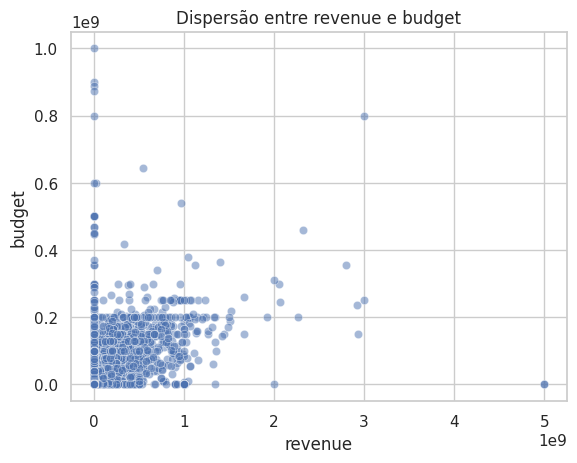

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='revenue', y='budget', alpha=0.5)
plt.title('Dispersão entre revenue e budget')
plt.show()


In [ ]:
from scipy.stats import spearmanr

# Remover nulos para evitar erros
df_corr = df[['vote_average', 'vote_count']].dropna()

# Calcular correlação de Spearman
corr, p = spearmanr(df_corr['vote_average'], df_corr['vote_count'])

print(f"Correlação de Spearman entre vote_average e vote_count:")
print(f"Coeficiente de correlação: {corr:.4f}")
print(f"Valor-p: {p:.5f}")

# Interpretação básica
if p < 0.05:
    print("=> Existe uma correlação estatisticamente significativa.")
else:
    print("=> Não há correlação estatisticamente significativa.")


Correlação de Spearman entre vote_average e vote_count:
Coeficiente de correlação: 0.9599
Valor-p: 0.00000
=> Existe uma correlação estatisticamente significativa.


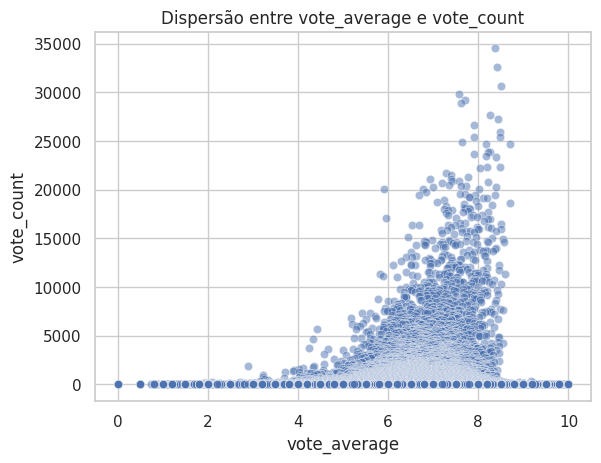

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='vote_average', y='vote_count', alpha=0.5)
plt.title('Dispersão entre vote_average e vote_count')
plt.show()


In [ ]:
from scipy.stats import spearmanr

# Remover nulos para evitar erros
df_corr = df[['vote_average', 'revenue']].dropna()

# Calcular correlação de Spearman
corr, p = spearmanr(df_corr['vote_average'], df_corr['revenue'])

print(f"Correlação de Spearman entre vote_average e revenue:")
print(f"Coeficiente de correlação: {corr:.4f}")
print(f"Valor-p: {p:.5f}")

# Interpretação básica
if p < 0.05:
    print("=> Existe uma correlação estatisticamente significativa.")
else:
    print("=> Não há correlação estatisticamente significativa.")


Correlação de Spearman entre vote_average e revenue:
Coeficiente de correlação: 0.1498
Valor-p: 0.00000
=> Existe uma correlação estatisticamente significativa.


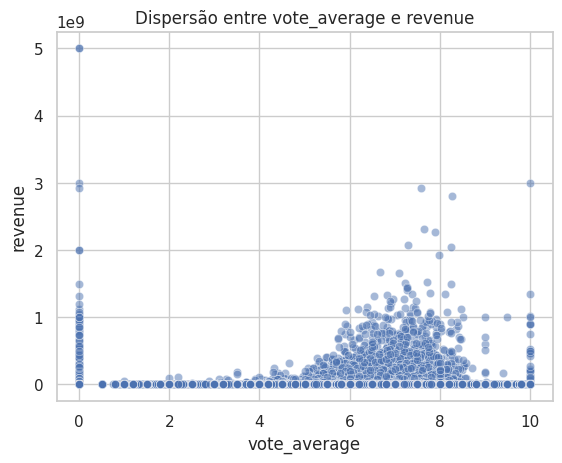

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='vote_average', y='revenue', alpha=0.5)
plt.title('Dispersão entre vote_average e revenue')
plt.show()


In [ ]:
from scipy.stats import spearmanr

# Remover nulos para evitar erros
df_corr = df[['vote_average', 'budget']].dropna()

# Calcular correlação de Spearman
corr, p = spearmanr(df_corr['vote_average'], df_corr['budget'])

print(f"Correlação de Spearman entre vote_average e budget:")
print(f"Coeficiente de correlação: {corr:.4f}")
print(f"Valor-p: {p:.5f}")

# Interpretação básica
if p < 0.05:
    print("=> Existe uma correlação estatisticamente significativa.")
else:
    print("=> Não há correlação estatisticamente significativa.")


Correlação de Spearman entre vote_average e budget:
Coeficiente de correlação: 0.0790
Valor-p: 0.00000
=> Existe uma correlação estatisticamente significativa.


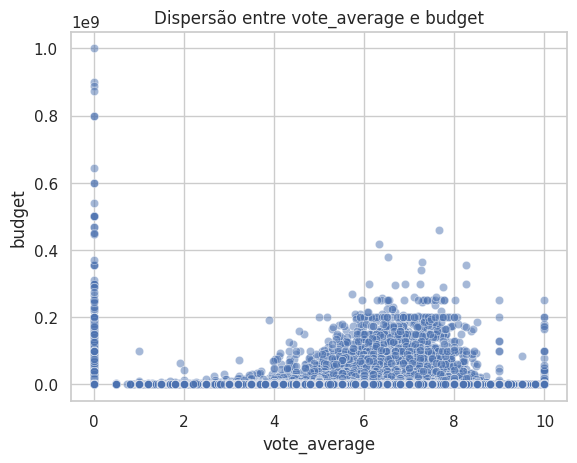

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='vote_average', y='budget', alpha=0.5)
plt.title('Dispersão entre vote_average e budget')
plt.show()


In [ ]:
print(df_processed.dtypes)

id                        int64
title                    object
vote_average            float64
vote_count                int64
status                   object
release_date             object
revenue                   int64
runtime                   int64
adult                      bool
budget                    int64
original_language        object
original_title           object
overview                 object
popularity              float64
tagline                  object
genres                   object
production_companies     object
production_countries     object
spoken_languages         object
keywords                 object
dtype: object


In [ ]:
columns_to_drop = ['id', 'vote_average', 'vote_count', 'status', 'release_date', 'revenue', 'runtime',
                   'adult', 'budget', 'original_title', 'popularity', 'production_countries']

df_final = df_processed.drop(columns=columns_to_drop)

df_final.head()

,title,original_language,overview,tagline,genres,production_companies,spoken_languages,keywords
0,Inception,en,"Cobb, a skilled thief who commits corporate es...",Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,Interstellar,en,The adventures of a group of explorers who mak...,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...",English,"rescue, future, spacecraft, race against time,..."
2,The Dark Knight,en,Batman raises the stakes in his war on crime. ...,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,Avatar,en,"In the 22nd century, a paraplegic Marine is di...",Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","English, Spanish","future, society, culture clash, space travel, ..."
4,The Avengers,en,When an unexpected enemy emerges and threatens...,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [ ]:
df_final.isnull().sum()

,0
title,13
original_language,0
overview,268393
tagline,1073622
genres,522941
production_companies,698852
spoken_languages,554320
keywords,924047
